# Systemy inspekcji wizualnej  
## Laboratorium  4 
Temat: Podstawowe operacje na obrazach

Instrukcję opracował: dr inż. Łukasz Jeleń  
  
Wrocław 2022

---

Nazwisko i Imię:  Paweł Pelar  
Nr albumu:  243480  
data wykonania ćwiczenia: 17.11.23 

---

# 1. Narzędzia

Na zjęciach korzystamy z pythnona, a jako środowisko pracy mają Państwo do wyboru Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje. 

# 2. Zadania

## Zadanie 1 - wczytywanie, wyznaczanie histogramów

Dla 3 obrazów wykonanych na poprzednich zajęciach:

### a) Histogramy w odcieniach szarości 
  
Wyznacz histogram odcieni szarości (należy zamienić obraz np.: za pomoca `COLOR_BGR2GRAY`) wczytywanych

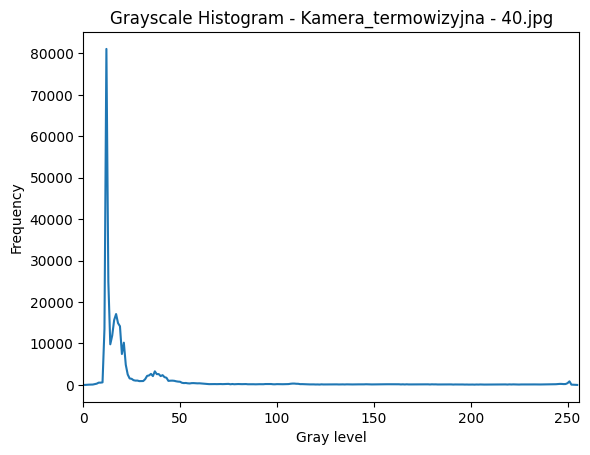

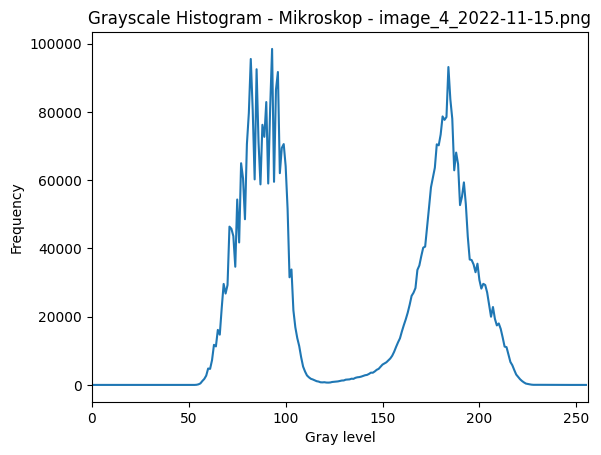

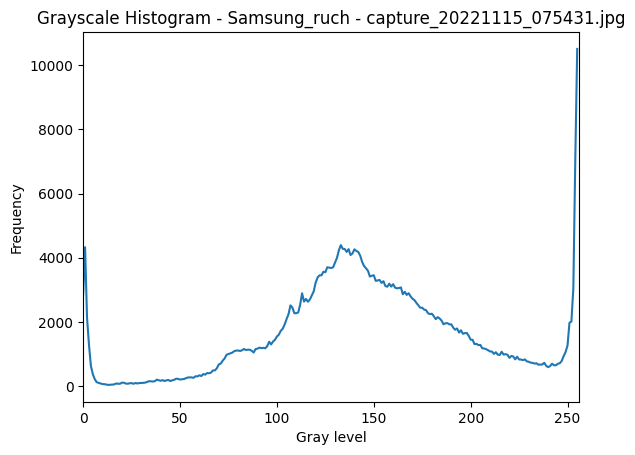

In [6]:
# tutaj kod do zadania a)
import cv2
import matplotlib.pyplot as plt
import os

def histogram_of_grayness(image_path):
    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    parts_of_path = os.path.normpath(image_path).split(os.sep)[-2:]
    title = "Grayscale Histogram - " + " - ".join(parts_of_path)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray level")
    plt.ylabel("Frequency")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

histogram_of_grayness(os.path.join("zdjecia", "Kamera_termowizyjna", "40.jpg"))
histogram_of_grayness(os.path.join("zdjecia", "Mikroskop", "image_4_2022-11-15.png"))
histogram_of_grayness(os.path.join("zdjecia", "Samsung_ruch", "capture_20221115_075431.jpg"))

### b) Histogramy obrazu kolorowego  
  
Wyznacz histogram kolorowy wczytywanych obrazów

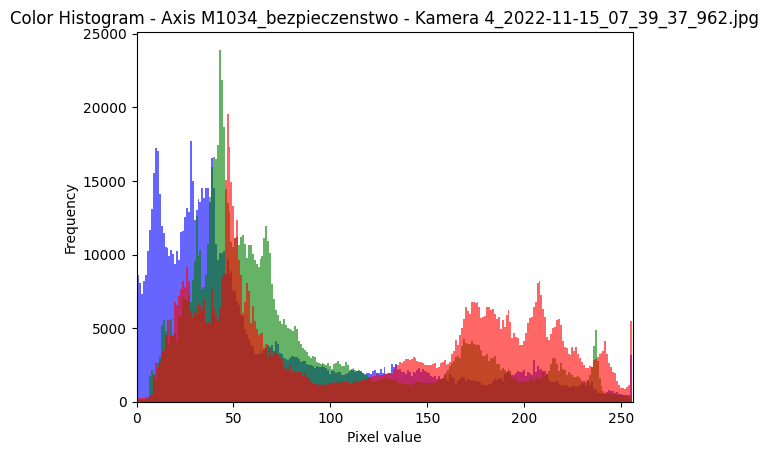

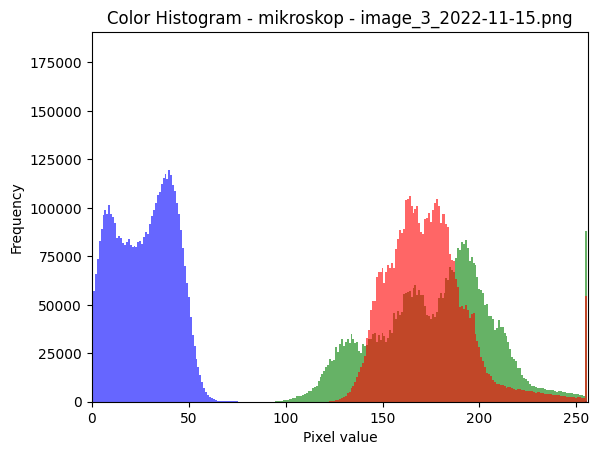

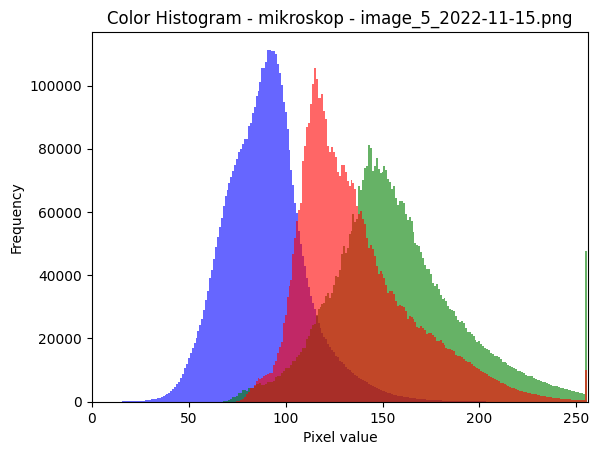

In [20]:
# tutaj kod do zadania b)
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

def histogram_of_color(image_path):
    image = cv2.imread(image_path)

    channels = cv2.split(image)

    colors = ('b', 'g', 'r')

    parts_of_path = os.path.normpath(image_path).split(os.sep)[-2:]
    title = "Color Histogram - " + " - ".join(parts_of_path)

    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel value")
    plt.ylabel("Frequency")

    bin_edges = np.arange(257)

    for (channel, color) in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256]).flatten()
        plt.bar(bin_edges[:-1], hist, width=1, color=color, alpha=0.6)

    plt.xlim([0, 256])
    plt.show()


histogram_of_color(os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_37_962.jpg"))
histogram_of_color(os.path.join("zdjecia", "mikroskop", "image_3_2022-11-15.png"))
histogram_of_color(os.path.join("zdjecia", "mikroskop", "image_5_2022-11-15.png"))


## Zadanie 2 - operacje podstawowe na obrazach  
  
Dla obrazów wykonanych na poprzednich zajęciach:

### a) Suma obrazów  
  
Po wczytaniu i zamianie 2 obrazów kolorowych na obrazy monochromatyczne wyznacz ich sumę jako $y_{ij} = Normalize[f_{ij} + g_{ij}]$. Przeprowadź noramalizację na dwa sposoby:  
- Poprzez obcięcie wartości powyżej 255 do 255  
  
- Poprzez: $y_{ij} = \frac{f_{ij}}{2} + \frac{g_{ij}}{2}$  
  
Zaobserwowane różnice opis we wnioskach do Laboratorium

Odcięcie [[249 250 251 ... 255 255 255]
 [252 252 253 ... 255 255 255]
 [252 252 253 ... 255 255 255]
 ...
 [122 122 123 ... 103 103 103]
 [122 122 123 ... 103 103 103]
 [122 122 123 ... 103 103 103]]
Średnia [[249 250 251 ... 255 255 255]
 [252 252 253 ... 255 255 255]
 [252 252 253 ... 255 255 255]
 ...
 [122 122 123 ... 103 103 103]
 [122 122 123 ... 103 103 103]
 [122 122 123 ... 103 103 103]]


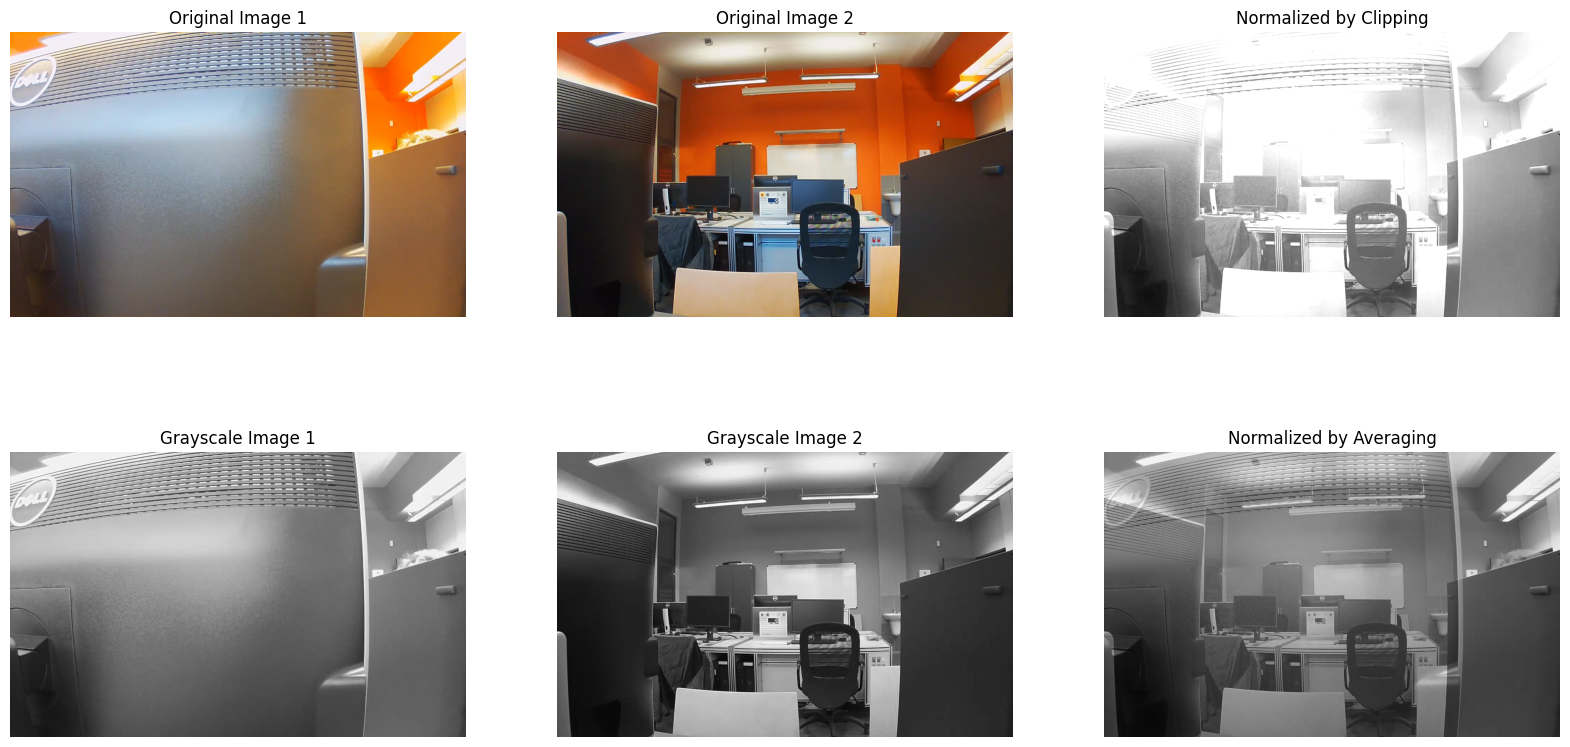

In [24]:
import cv2
import numpy as np

def normalize_images(path1, path2):
    image1 = cv2.imread(path1)
    image2 = cv2.imread(path2)
    
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    summed_image = gray_image1.astype(int) + gray_image2.astype(int)
    
    sum_clip = np.clip(summed_image, 0, 255).astype(np.uint8)
    
    sum_average = ((gray_image1 / 2) + (gray_image2 / 2)).astype(np.uint8)

    return sum_clip, sum_average

path1 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_03_635.jpg")
path2 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_37_962.jpg")
sum_clip, sum_average = normalize_images(path1, path2)
print("Clip", sum_clip)
print("Average", sum_clip)

plt.figure(figsize=(20, 10))

# Display original images
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')
plt.axis('off')

# Display grayscale images
plt.subplot(2, 3, 4)
plt.imshow(cv2.imread(path1, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Grayscale Image 1')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.imread(path2, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Grayscale Image 2')
plt.axis('off')

# Display normalized images
plt.subplot(2, 3, 3)
plt.imshow(sum_clip, cmap='gray')
plt.title('Normalized by Clipping')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(sum_average, cmap='gray')
plt.title('Normalized by Averaging')
plt.axis('off')

plt.show()


### b) Różnica obrazów  
  
Po wczytaniu i zamianie 2 obrazów kolorowych na obrazy monochromatyczne wyznacz ich różnicę jako $y_{ij} = Normalize[f_{ij} - g_{ij}]$.  
  
- Dokonaj normalizacji do przedziału `[0,255]` przez obcinanie poniżej 0 do 0  
- Wyznacz różnicę bezwzględną: $y_{ij} = abs(f_{ij} - g_{ij})$  
  
Zaobserwowane różnice opis we wnioskach do Laboratorium

Absolute Difference:
[[59 58 59 ...  5  4  4]
 [62 60 59 ...  5  6  6]
 [60 60 59 ...  5  5  5]
 ...
 [32 32 33 ... 43 43 43]
 [32 32 33 ... 43 43 43]
 [32 32 33 ... 43 43 43]]
Normalized difference:
[[59 58 59 ...  5  4  4]
 [62 60 59 ...  5  6  6]
 [60 60 59 ...  5  5  5]
 ...
 [32 32 33 ... 43 43 43]
 [32 32 33 ... 43 43 43]
 [32 32 33 ... 43 43 43]]


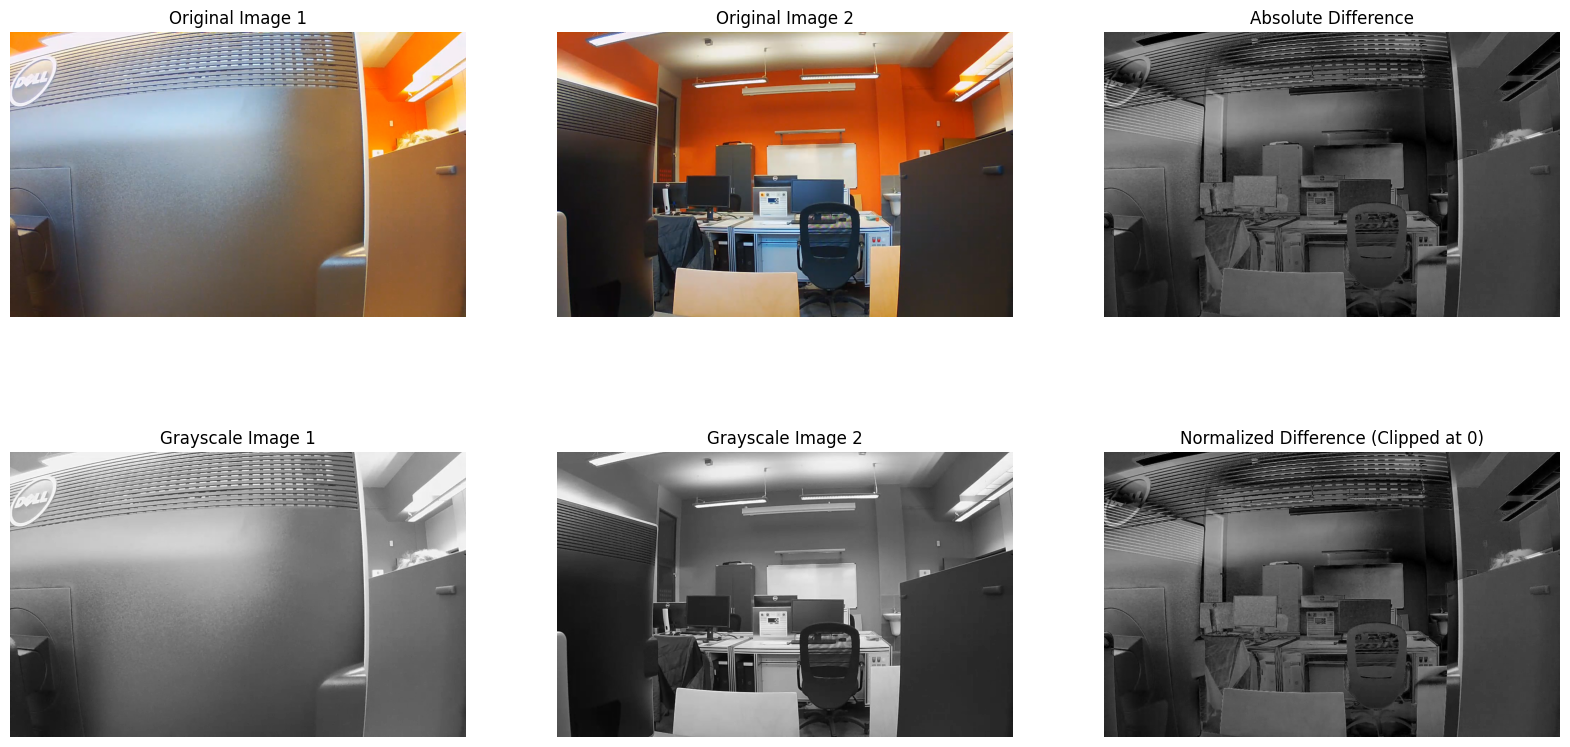

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalize_images_subtraction(path1, path2):
    image1 = cv2.imread(path1)
    image2 = cv2.imread(path2)
    
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    abs_difference = cv2.absdiff(gray_image1, gray_image2)
    
    norm_diff = np.clip(abs_difference, 0, 255).astype(np.uint8)

    return abs_difference, norm_diff

path1 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_03_635.jpg")
path2 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_37_962.jpg")
abs_difference, normalized_difference = normalize_images_subtraction(path1, path2)

print("Absolute Difference:")
print(abs_difference)
print("Normalized difference:")
print(normalized_difference)

# Visual comparison
plt.figure(figsize=(20, 10))

# Display original images
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')
plt.axis('off')

# Display grayscale images
plt.subplot(2, 3, 4)
plt.imshow(cv2.imread(path1, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Grayscale Image 1')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.imread(path2, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Grayscale Image 2')
plt.axis('off')

# Display absolute difference image
plt.subplot(2, 3, 3)
plt.imshow(abs_difference, cmap='gray')
plt.title('Absolute Difference')
plt.axis('off')

# Display normalized difference image
plt.subplot(2, 3, 6)
plt.imshow(normalized_difference, cmap='gray')
plt.title('Normalized Difference (Clipped at 0)')
plt.axis('off')

plt.show()


### c) Maksimum i minimum  
  
Po wczytaniu i zamianie 2 obrazów kolorowych na obrazy monochromatyczne wyznacz: 
  
- Maksimum z dwóch obrazów przez $y_{ij} = Max(f_{ij}, g_{ij})$
- Minimum z dwóch obrazów przez $y_{ij} = Min(f_{ij}, g_{ij})$  
  
Zaobserwowane różnice opis we wnioskach do Laboratorium

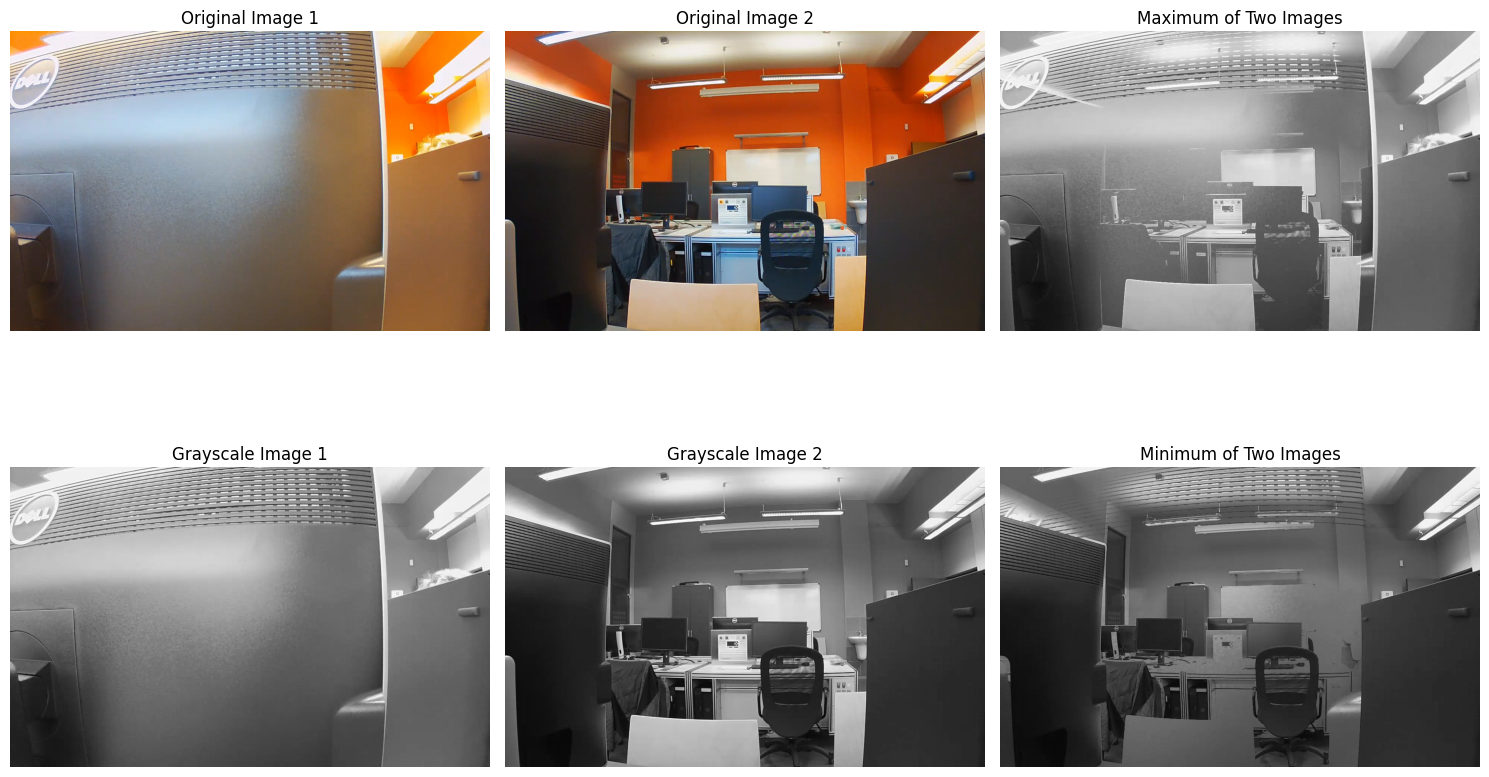

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def max_min_images(path1, path2):
    image1 = cv2.imread(path1)
    image2 = cv2.imread(path2)

    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    max_image = np.maximum(gray_image1, gray_image2)
    min_image = np.minimum(gray_image1, gray_image2)

    return gray_image1, gray_image2, max_image, min_image

path1 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_03_635.jpg")
path2 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_37_962.jpg")
gray_image1, gray_image2, max_image, min_image = max_min_images(path1, path2)

# Visual comparison
plt.figure(figsize=(15, 10))

# Display original images
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')
plt.axis('off')

# Display grayscale images
plt.subplot(2, 3, 4)
plt.imshow(gray_image1, cmap='gray')
plt.title('Grayscale Image 1')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gray_image2, cmap='gray')
plt.title('Grayscale Image 2')
plt.axis('off')

# Display maximum of two images
plt.subplot(2, 3, 3)
plt.imshow(max_image, cmap='gray')
plt.title('Maximum of Two Images')
plt.axis('off')

# Display minimum of two images
plt.subplot(2, 3, 6)
plt.imshow(min_image, cmap='gray')
plt.title('Minimum of Two Images')
plt.axis('off')

plt.tight_layout()
plt.show()


### d) Operacje logiczne  
  
Po wczytaniu 2 obrazów kolorowych wyknoaj:  
  
- zamień obrazy na obrazy monochromatyczne i wykonaj operacje `OR`, `XOR` i `AND` 
- zamień obrazy na obrazy binarne i wykonaj operacje `OR`, `XOR` i `AND` 
  
Podsumuj obsewrwacje we wnioskach do Laboratorium

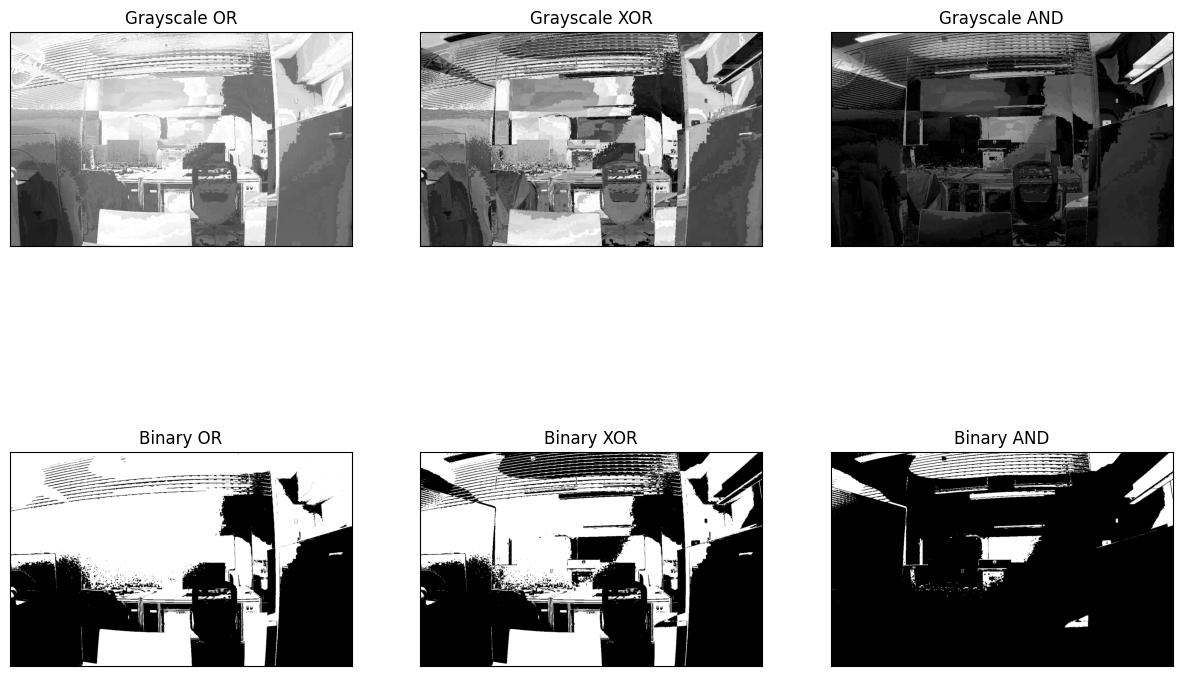

(array([[223, 250, 251, ..., 255, 255, 255],
        [223, 252, 253, ..., 255, 255, 255],
        [252, 252, 253, ..., 255, 255, 255],
        ...,
        [109, 109, 111, ...,  95,  95,  95],
        [109, 109, 111, ...,  95,  95,  95],
        [109, 109, 111, ...,  95,  95,  95]], dtype=uint8),
 array([[197, 250, 251, ...,  29,  28,  28],
        [194, 252, 253, ...,  29,  30,  30],
        [252, 252, 253, ...,  29,  29,  29],
        ...,
        [ 96,  96,  99, ...,  87,  87,  87],
        [ 96,  96,  99, ...,  87,  87,  87],
        [ 96,  96,  99, ...,  87,  87,  87]], dtype=uint8),
 array([[ 26,   0,   0, ..., 226, 227, 227],
        [ 29,   0,   0, ..., 226, 225, 225],
        [  0,   0,   0, ..., 226, 226, 226],
        ...,
        [ 13,  13,  12, ...,   8,   8,   8],
        [ 13,  13,  12, ...,   8,   8,   8],
        [ 13,  13,  12, ...,   8,   8,   8]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bitwise_operations_on_images(path1, path2):
    image1 = cv2.imread(path1)
    image2 = cv2.imread(path2)

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    gray_or = cv2.bitwise_or(gray1, gray2)
    gray_xor = cv2.bitwise_xor(gray1, gray2)
    gray_and = cv2.bitwise_and(gray1, gray2)

    _, binary1 = cv2.threshold(gray1, 128, 255, cv2.THRESH_BINARY)
    _, binary2 = cv2.threshold(gray2, 128, 255, cv2.THRESH_BINARY)

    binary_or = cv2.bitwise_or(binary1, binary2)
    binary_xor = cv2.bitwise_xor(binary1, binary2)
    binary_and = cv2.bitwise_and(binary1, binary2)

    plt.figure(figsize=(15, 10))
    
    titles = ['Grayscale OR', 'Grayscale XOR', 'Grayscale AND', 'Binary OR', 'Binary XOR', 'Binary AND']
    images = [gray_or, gray_xor, gray_and, binary_or, binary_xor, binary_and]
    
    for i in range(6):
        plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()
    
    return gray_or, gray_xor, gray_and, binary_or, binary_xor, binary_and

path1 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_03_635.jpg")
path2 = os.path.join("zdjecia", "Axis M1034_bezpieczenstwo", "Kamera 4_2022-11-15_07_39_37_962.jpg")

bitwise_operations_on_images(path1, path2)


## Zadanie 3 - Operacje podstawowe na pojedynczym obrazie 
  
Dla 3 obrazów wykonanych na poprzednich zajęciach:  

### a)  Transformacja Potęgowa
  
Zaimplementuj transformację potęgową (korekcja gamma) wyrażoną przez zależność: $y_{ij}= c*f_{ij}^{\gamma}$, gdzie stałe $c$ i $\gamma$ należy podać z klawiatury. Przeprowadź ekspertymenty dla różnych wartości $\gamma$ (dla wartości z przedziału `[0,0.9]` oraz wartości `>1`)

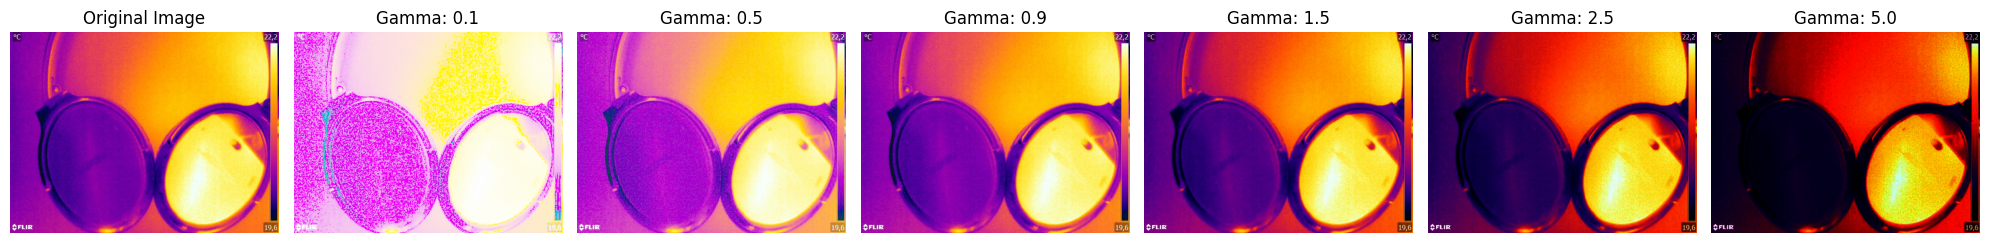

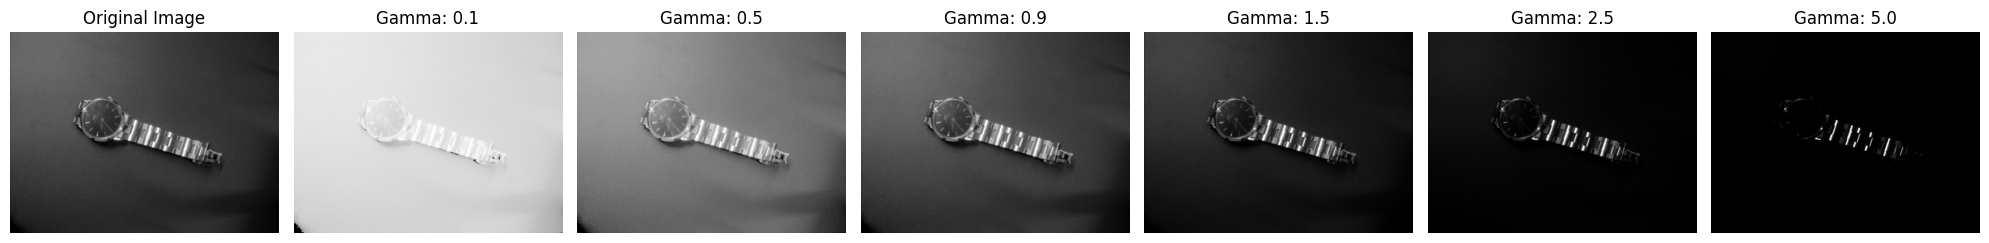

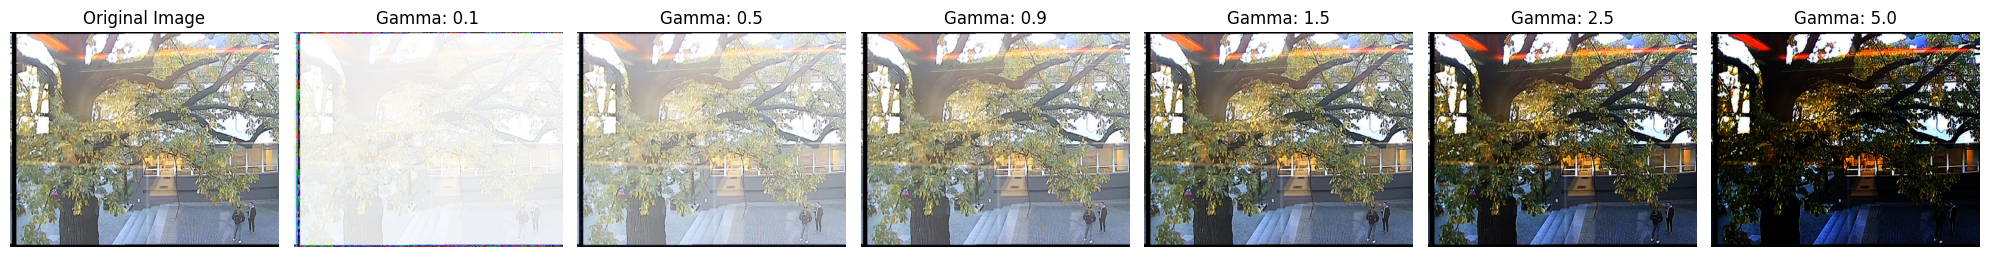

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image_path, c, gamma):
    image = cv2.imread(image_path)
    
    corrected_image = c * np.power(image / 255.0, gamma)

    corrected_image = np.clip(corrected_image * 255, 0, 255).astype(np.uint8)
    
    return corrected_image

def visualize_gamma_correction(image_path, c, gammas):
    original_image = cv2.imread(image_path)
    if original_image is None:
        raise ValueError("Could not load the image. Check the file path.")
    
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    fig, axes = plt.subplots(1, len(gammas) + 1, figsize=(20, 10))
    
    axes[0].imshow(original_image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    for i, gamma_value in enumerate(gammas, 1):
        corrected_image = gamma_correction(image_path, c, gamma_value)
        axes[i].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Gamma: {gamma_value}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

image_path = os.path.join("zdjecia", "Kamera_termowizyjna", "7.jpg")
image_path2 = os.path.join("zdjecia", "Kamera_HDR", "zegar.jpg")
image_path3 = os.path.join("zdjecia", "Samsung_ruch", "capture_20221115_075410.jpg")

c = 1 
gammas = [0.1, 0.5, 0.9, 1.5, 2.5, 5.0]

visualize_gamma_correction(image_path, c, gammas)
visualize_gamma_correction(image_path2, c, gammas)
visualize_gamma_correction(image_path3, c, gammas)



### b)  Negacja obrazu  
  
Zaimplementuj negację obrazu wykorzystując informację, że $y_{ij}= L - 1 - f_{ij}$, gdzie $L=2^k$, a $k$ jest ilością bitów w obrazie.  
  
Wskazówka: Obraz monochromatyczny jest obrazem 8-bitowym, zatem w tym przypadku $L=255$

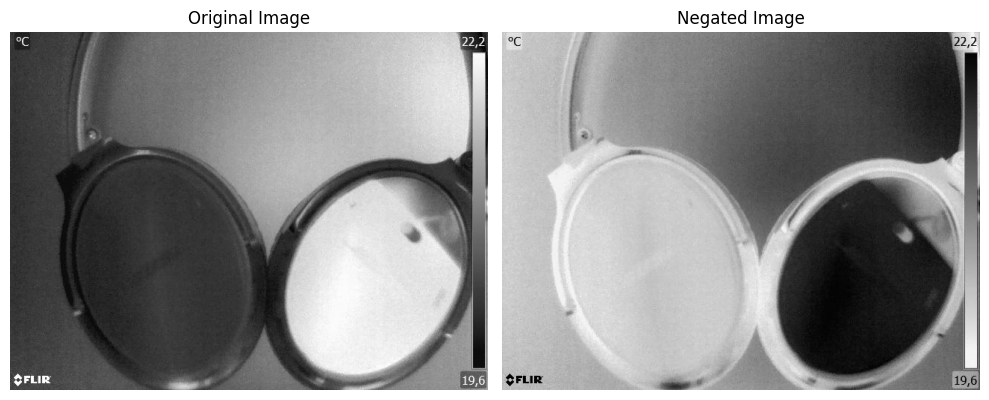

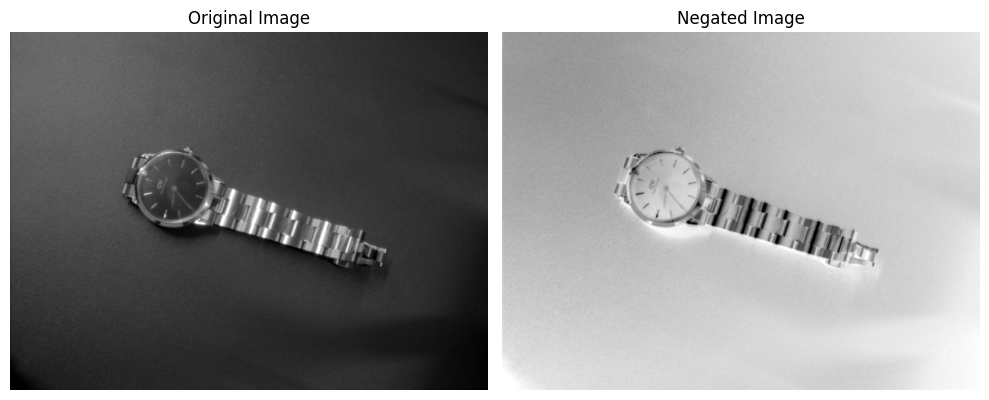

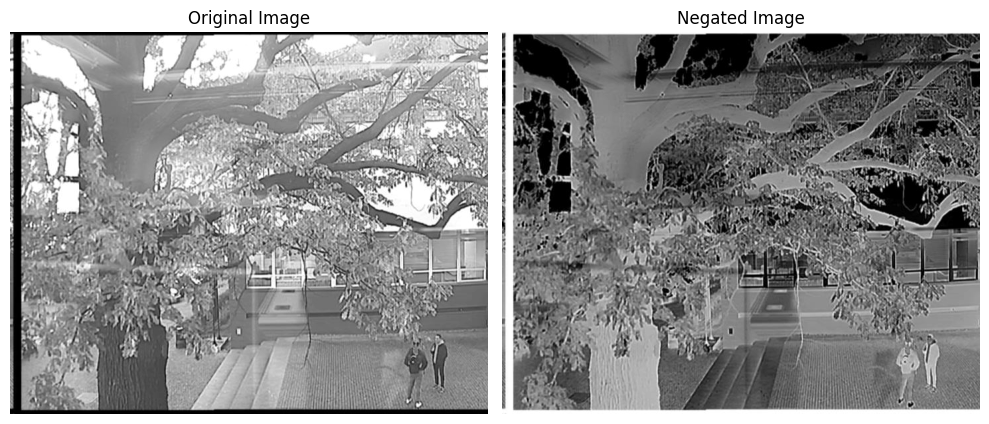

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_negation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 
    L = 256  # L is 256 for an 8-bit image
    negated_image = L - 1 - image
    
    return negated_image

def visualize_image_negation(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    negated_image = image_negation(image_path)
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negated_image, cmap='gray')
    plt.title('Negated Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

image_path = os.path.join("zdjecia", "Kamera_termowizyjna", "7.jpg")
image_path2 = os.path.join("zdjecia", "Kamera_HDR", "zegar.jpg")
image_path3 = os.path.join("zdjecia", "Samsung_ruch", "capture_20221115_075410.jpg")

visualize_image_negation(image_path)
visualize_image_negation(image_path2)
visualize_image_negation(image_path3)



## Wnioski  
  
Na podstawie przeporwadzonych eksperymentów opisz jakie zaobserwowałaś/eś różnice między poszczególnymi obrazami dla wykonywanych operacji obrazowych. 

2a:

Normalizacja przed odcięcie:
- Metoda ta wydaje się zachowywać kontrast oryginalnych obrazów, ale jednocześnie może prowadzić do utraty szczegółów w bardzo jasnych obszarach. To szczególnie widoczne w miejscach, gdzie oryginalnie występowały najjaśniejsze elementy, które po obcięciu stały się jednolicie białe.
- Obszary, w których jasność sumowanych obrazów przekraczała 255, są teraz całkowicie białe, co może wpłynąć na utratę informacji w tych regionach.

Normalizacja przed uśrednienie:
- Ta metoda normalizacji wydaje się dawać bardziej stonowany obraz z niższym kontrastem niż oryginały. Wynika to z tego, że żadna wartość piksela nie zostaje przycięta do maksimum, a zatem obraz końcowy ma niższą jasność ogólną.
- Uśrednianie może lepiej zachować szczegóły w jasnych obszarach, ponieważ wartości pikseli nie są przycinane do wartości maksymalnej. Dzięki temu metoda ta może być lepsza do celów analitycznych, gdzie ważne jest zachowanie jak największej ilości danych.

2b:

Różnica bezwzględna:
- Różnica bezwzględna pomiędzy dwoma obrazami w skali szarości pokazuje obszary, w których obrazy się różnią. Wysokie wartości w wynikowym obrazie różnicy wskazują na duże różnice w intensywności pikseli pomiędzy dwoma obrazami.
- Na wynikowym obrazie różnicy bezwzględnej, miejsca, gdzie nie ma znaczących różnic pomiędzy obrazami, są ciemniejsze, co wskazuje na podobieństwo wartości pikseli w tych regionach.

Normalizacja różnicy:
- Po zastosowaniu normalizacji przez obcinanie do wartości 0, obraz różnicy stał się jaśniejszy w obszarach, gdzie oryginalna różnica była ujemna. Dzięki temu zabiegowi zwiększa się czytelność różnic między obrazami.
- Normalizacja ta pozwala lepiej zobaczyć, gdzie zachodzą zmiany między obrazami, nie wprowadzając jednocześnie artefaktów, które mogłyby powstać przy wartościach ujemnych.

2c:

Obraz wynikowy po operacji maksimum:
- Obraz wynikowy pokazuje najjaśniejsze wartości z obu obrazów monochromatycznych. Ta metoda może być użyteczna do identyfikowania i podkreślania jasnych obiektów lub obszarów na obrazach, gdzie występuje ruch lub zmiana.
- W obszarach, gdzie oba obrazy są jasne, efekt końcowy jest jeszcze jaśniejszy, co może być pomocne przy wyróżnianiu detali.

Obraz wynikowy po operacji minimum:
- Obraz po operacji minimum przedstawia najciemniejsze wartości z obu obrazów monochromatycznych. Jest to przydatne, gdy chcemy zachować informacje o najciemniejszych obszarach lub przy detekcji tła.
- Widać wyraźne zaciemnienie obrazu w miejscach, gdzie co najmniej jeden z obrazów źródłowych jest ciemny.

2d:

Obrazy monochromatyczne:
- Operacja OR na obrazach monochromatycznych wydobywa wszystkie jasne obszary z obu obrazów, tworząc rezultat, który jest złożeniem wszystkich szczegółów. Jest to przydatne do identyfikacji wszystkich możliwych elementów na scenie.
- Operacja XOR eksponuje różnice między obrazami, pokazując obszary, które się nie pokrywają. Może to być wykorzystane do wykrywania zmian lub ruchu.
- Operacja AND wyświetla jedynie te obszary, które są wspólne dla obu obrazów, co może być użyteczne do identyfikacji stałych elementów sceny.

Obrazy binarne:
- Operacja OR na obrazach binarnych łączy wszystkie elementy obecne na obu obrazach, pokazując pełny zakres obiektów, które są widoczne na każdym z obrazów.
- Operacja XOR również tutaj podkreśla różnice między obrazami, jednak w formie bardziej wyrazistej i z mniejszą ilością szczegółów z powodu binarnego charakteru obrazów.
- Operacja AND jest szczególnie użyteczna w obrazach binarnych, ponieważ wyraźnie pokazuje te elementy, które są obecne na obu obrazach. W kontekście binarnym, rezultat jest bardziej dyskretny i pozbawiony pośrednich odcieni szarości, co może ułatwić dalszą analizę.